# Mercedes-Benz Group business (Ex. Daimler Group, Daimler-Benz) Data Analysis and Visualizations 
## Hypothesis Formation

---
* * *

all imports

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### First of all, let's output our dataset of `mercedec-benz(daimler)` cars 

In [27]:
cars = pd.read_csv("merc.csv")
cars = cars.sort_values(by="year")

cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12072,M Class,1970,24999,Automatic,14000,Diesel,305,39.2,0.0
11912,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2
11794,S Class,1998,19990,Automatic,43534,Petrol,265,23.3,6.0
11808,SLK,1998,1990,Automatic,113557,Petrol,265,32.1,2.3
11860,SL CLASS,1998,10450,Automatic,49000,Petrol,255,28.2,3.2
...,...,...,...,...,...,...,...,...,...
2789,GLA Class,2020,21991,Semi-Auto,1695,Petrol,145,44.8,1.6
2787,C Class,2020,28590,Semi-Auto,1501,Diesel,145,54.3,1.6
9318,A Class,2020,24109,Semi-Auto,1000,Diesel,145,67.3,1.5
4983,GLC Class,2020,49980,Semi-Auto,3999,Petrol,145,26.4,3.0


### Let's show distribution of prices, transmissions and fuel types <p> to be able to clearly see what are the most common types

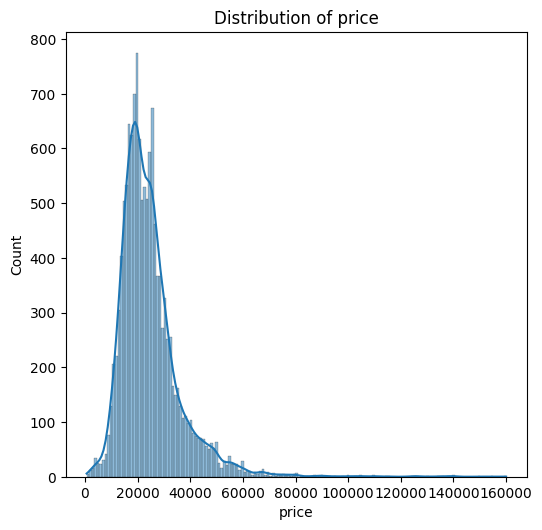

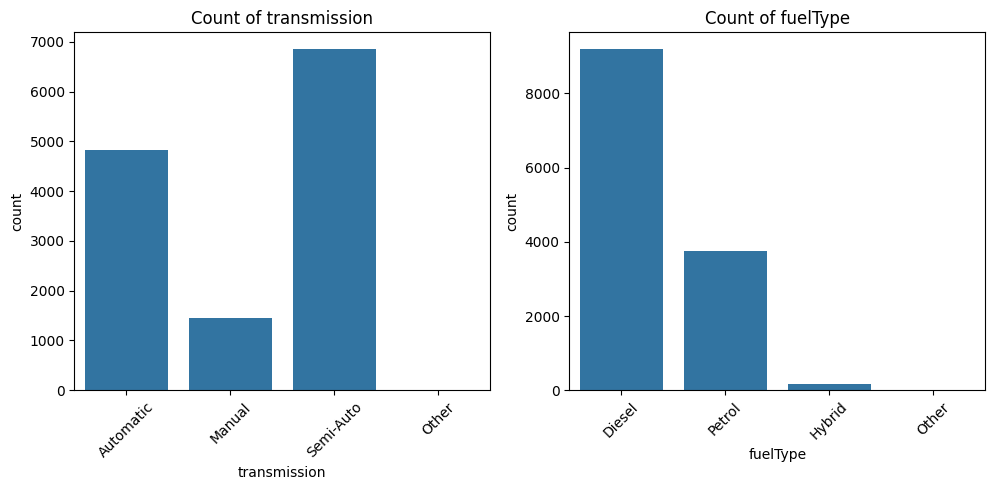

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(cars['price'], kde=True)
plt.title(f'Distribution of price')
plt.xlabel("price")

plt.tight_layout()
plt.show()

cat_vars = ['transmission', 'fuelType']
plt.figure(figsize=(15, 5))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=cars, x=var)
    plt.title(f'Count of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### We can see that the most common price for mercedes car is about **20000 eur** <p> and **Diesel** is the most common fuel type
***

## Let's consider a few hypothesises and determine whether we can reject them or not
### Let's check if a true mean is really 24600 euros

In [23]:
import pandas as pd
from scipy import stats

prices = cars['price']

t_stat, p_value = stats.ttest_1samp(prices, 24600)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The mean price is not equal to $24,600.")
else:
    print("Fail to reject the null hypothesis. The mean price is equal to $24,600.")

t-statistic: 0.9535948255919479
p-value: 0.3403063467635803
Fail to reject the null hypothesis. The mean price is equal to $24,600.


Transmission Type vs Price:
Null Hypothesis (H0): There is no significant difference in the mean price between cars with different transmission types (Automatic, Semi-Auto, etc.).
Alternative Hypothesis (H1): There is a significant difference in the mean price between cars with different transmission types.

In [28]:
import pandas as pd
from scipy.stats import f_oneway

# one-way ANOVA
f_stat, p_value = f_oneway(
    cars[cars['transmission'] == 'Automatic']['price'],
    cars[cars['transmission'] == 'Semi-Auto']['price'],
    cars[cars['transmission'] == 'Manual']['price']

)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value > alpha:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean price between cars with different transmission types.")
else:
    print("Reject the null hypothesis. There is a significant difference in the mean price between cars with different transmission types.")


F-statistic: 607.8695684782364
P-value: 3.428781548142378e-253
Reject the null hypothesis. There is a significant difference in the mean price between cars with different transmission types.


***

### Now let's consider this dataset:
The Mercedes-Benz Vehicle Performance and Features Dataset is a comprehensive collection of data that provides a detailed overview of various Mercedes-Benz vehicles' performance, pricing, and customer satisfaction.

The dataset includes several important attributes such as the name of the vehicle, which provides information on the model and make of the car. The mileage column records the total distance that the car has travelled, which is a critical factor in determining its overall value. The dealer name column provides information on the name of the dealer selling the vehicle, which can provide insights into the quality of service provided by the dealer.

The dataset also includes two important columns related to customer satisfaction, namely the rating and rating count columns. The rating column provides the average rating of the vehicle based on customer reviews, while the rating count column records the total number of ratings received for the vehicle. These columns can be used to gauge the popularity and satisfaction levels of the vehicle among customers.

In [40]:
ratingsByDealer = pd.read_excel("Mercedes-Benz.xlsx");
ratingsByDealer

ratingsByDealer['Mileage'] = ratingsByDealer['Mileage'].astype(str).str.replace(' mi.', '').str.replace(',', '').astype(int)
ratingsByDealer['Price'] = ratingsByDealer['Price'].str.replace('$', '').str.replace(',', '').astype(int)
ratingsByDealer['Rating_count'] = ratingsByDealer['Rating_count'].astype(str).str.replace(',','').astype(int)

ratingsByDealer

,Name,Mileage,Dealer_name,Rating,Rating_count,Price
0,2021 Mercedes-Benz AMG E 53 Base 4MATIC,43503,Mercedes-Benz of Centerville,4.8,36,65118
1,2018 Mercedes-Benz S-Class S 450,36569,Mercedes-Benz of Atlanta Northeast,4.7,2053,57494
2,2022 Mercedes-Benz GLE 350 Base 4MATIC,2048,Mercedes-Benz of Rochester,4.5,6,59999
3,2019 Mercedes-Benz Maybach S 650 Base,19421,Euro Motorcars Bethesda,4.6,604,123881
4,2020 Mercedes-Benz AMG C 43 Base 4MATIC,18511,Fletcher Jones Motorcars of Fremont,4.6,1221,46980
...,...,...,...,...,...,...
3124,2021 Mercedes-Benz S-Class S 580 4MATIC,8540,House of Imports,4.7,1806,90985
3125,2021 Mercedes-Benz AMG GLE 63 S-Model 4MATIC,10478,RBM of Atlanta,4.1,1028,102881
3126,2018 Mercedes-Benz AMG GT S,9047,Mercedes-Benz of South Charlotte,4.8,1339,106896
3127,2020 Mercedes-Benz S-Class S 450,25120,W.I. Simonson Inc.,4.6,902,57776


### We have *Rating* and *Price* columns where there might be a relationship
### let's make a significance test to really know if there is

                                              Name  Mileage                          Dealer_name  Rating  Rating_count   Price
0          2021 Mercedes-Benz AMG E 53 Base 4MATIC    43503         Mercedes-Benz of Centerville     4.8            36   65118
1                 2018 Mercedes-Benz S-Class S 450    36569   Mercedes-Benz of Atlanta Northeast     4.7          2053   57494
2           2022 Mercedes-Benz GLE 350 Base 4MATIC     2048           Mercedes-Benz of Rochester     4.5             6   59999
3            2019 Mercedes-Benz Maybach S 650 Base    19421              Euro Motorcars Bethesda     4.6           604  123881
4          2020 Mercedes-Benz AMG C 43 Base 4MATIC    18511  Fletcher Jones Motorcars of Fremont     4.6          1221   46980
5           2020 Mercedes-Benz GLS 450 Base 4MATIC    37314     Mercedes-Benz of Fort Washington     4.5          2827   63348
6                  2023 Mercedes-Benz EQB 250 Base     2819              Mercedes-Benz of Austin     4.8       

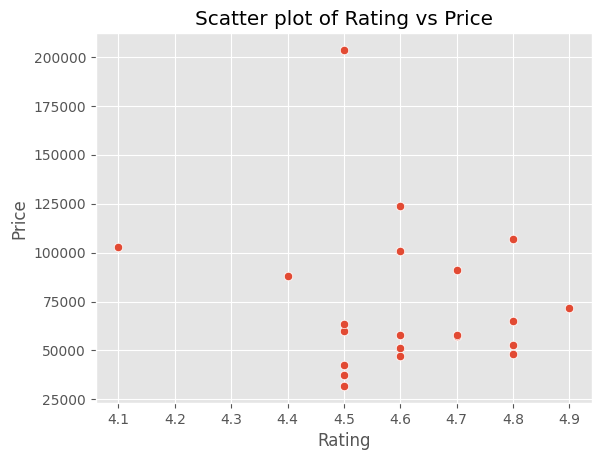

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, ttest_ind 
import matplotlib.pyplot as plt
import seaborn as sns


print(ratingsByDealer.to_string())

corr_coef = pearsonr(ratingsByDealer['Rating_count']*ratingsByDealer['Rating'], ratingsByDealer['Price'])

p_value = ttest_ind(ratingsByDealer['Rating_count']*ratingsByDealer['Rating'], ratingsByDealer['Price']).pvalue
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

# Plotting
sns.scatterplot(data=ratingsByDealer, x='Rating', y='Price')
plt.title('Scatter plot of Rating vs Price')
plt.show()


### We don't know the country of each dealer <p>Let's add it up by using GEOPY library.

In [16]:
print(ratingsByDealer.describe(include='all'))

                                          Name     Mileage  \
count                                     3129        3129   
unique                                      20          21   
top     2019 Mercedes-Benz GLS 450 Base 4MATIC  43,503 mi.   
freq                                       298         149   
mean                                       NaN         NaN   
std                                        NaN         NaN   
min                                        NaN         NaN   
25%                                        NaN         NaN   
50%                                        NaN         NaN   
75%                                        NaN         NaN   
max                                        NaN         NaN   

                             Dealer_name       Rating Rating_count    Price  
count                               3129  3129.000000         3129     3129  
unique                                19          NaN           18       21  
top     Mercedes-Benz

In [37]:
print(ratingsByDealer.head())

print(ratingsByDealer.isnull().sum())

ratingsByDealer['Mileage'] = ratingsByDealer['Mileage'].str.replace(' mi.', '').str.replace(',', '').astype(int)

print(ratingsByDealer.describe(include='all'))


NameError: name 'ratingsByDealer' is not defined

In [36]:
ratingsByDealer['Price'] = ratingsByDealer['Price'].str.replace('$','')
ratingsByDealer 

NameError: name 'ratingsByDealer' is not defined

***
### we have a dataset scraped from craiglist <p> let's clean it and leave only rows with mercedes-benz cars

<div class="alert alert-block alert-warning">
DON'T RERUN CODE, RUNTIME > 30 sec
</div>

In [16]:
vehicles = pd.read_csv('vehicles.csv')

vehicles = vehicles[vehicles['manufacturer'] == 'mercedes-benz']

vehicles.to_csv('vehicles_only-mercedes.csv')

In [18]:
vehicles = pd.read_csv('vehicles_only-mercedes.csv')


columns_to_drop = ['id', 'Unnamed: 0', 'VIN', 'lat', 'long', 'odometer']
vehicles.drop(columns=columns_to_drop, inplace=True)

vehicles.reset_index(drop=True, inplace=True)


vehicles.to_csv('vehicles_only-mercedes.csv', index=False)



In [24]:
vehicles = pd.read_csv('vehicles_only-mercedes.csv')
vehicles

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,drive,size,type,paint_color,image_url,description,county,state,posting_date
0,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,6000,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,...,automatic,rwd,NaN,sedan,blue,https://images.craigslist.org/00g0g_6wqTC1Js5v...,Diesel engine Mercedes e class. 7 speed auto t...,NaN,al,2021-04-13T12:54:00-0500
1,https://bham.craigslist.org/cto/d/birmingham-1...,birmingham,https://bham.craigslist.org,1300,1969.0,mercedes-benz,benz,NaN,NaN,gas,...,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_KljAvpSDdb...,Car has been sitting and everything is still o...,NaN,al,2021-05-04T07:10:04-0500
2,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,10990,2011.0,mercedes-benz,ml350,excellent,6 cylinders,gas,...,automatic,4wd,NaN,SUV,NaN,https://images.craigslist.org/00x0x_kA6LF50XDz...,CALL OR TEXT ME TODAY. BO AT 205-999-3203 Y...,NaN,al,2021-05-03T13:32:23-0500
3,https://bham.craigslist.org/cto/d/montevallo-1...,birmingham,https://bham.craigslist.org,5500,1974.0,mercedes-benz,1929 ssk replica,good,4 cylinders,gas,...,automatic,rwd,mid-size,convertible,yellow,https://images.craigslist.org/00M0M_e7Qu4htd0f...,1929 Mercedes Gazelle original replica 1974 . ...,NaN,al,2021-05-03T09:41:06-0500
4,https://bham.craigslist.org/ctd/d/mercedes-ben...,birmingham,https://bham.craigslist.org,0,2015.0,mercedes-benz,s-class,NaN,8 cylinders,gas,...,automatic,4wd,full-size,sedan,grey,https://images.craigslist.org/00f0f_48YBFcb5cM...,2015 Mercedes Benz S Class S 63 AMG AWD Design...,NaN,al,2021-05-03T00:22:00-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11812,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32990,2011.0,mercedes-benz,e-class e 63 amg,good,8 cylinders,gas,...,automatic,rwd,NaN,sedan,NaN,https://images.craigslist.org/00K0K_jazmBloHx7...,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-06T03:30:18-0600
11813,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,41990,2019.0,mercedes-benz,mercedes-amg cla,good,NaN,gas,...,other,NaN,NaN,coupe,black,https://images.craigslist.org/00U0U_2SvyNRQ0MT...,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-06T03:30:18-0600
11814,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,37590,2018.0,mercedes-benz,gle 350 sport,good,6 cylinders,gas,...,automatic,rwd,NaN,SUV,black,https://images.craigslist.org/00909_2woSBxFFxr...,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-06T03:30:18-0600
11815,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,...,other,rwd,NaN,sedan,white,https://images.craigslist.org/00808_bYj0inoZ58...,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-04T03:21:35-0600


***

0.7191895863615725


<Figure size 1000x600 with 0 Axes>

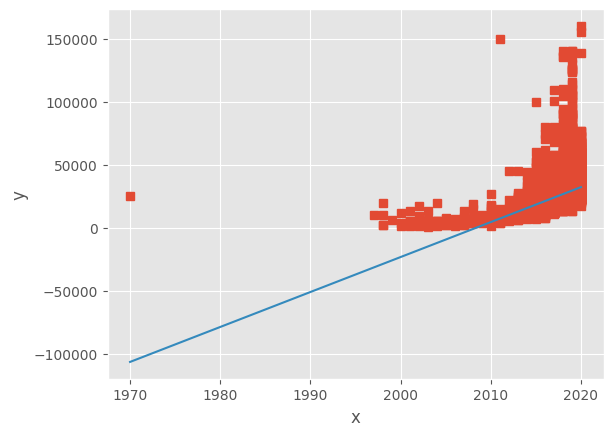

In [35]:
slope, intrcept, r, p, stderr = scipy.stats.linregress(cars['year'], cars['price'])
line = f'Regression line: y={intrcept:.2f}+{slope:.2f}x, r={r:.2f}'

x,y = pd.Series(cars['year']), pd.Series(cars['price'])
print(x.corr(y, method='spearman'))

plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.plot(cars['year'], cars['price'], linewidth=0, marker='s', label='Data points')
ax.plot(cars['year'], intrcept + slope * cars['year'], label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(True)
plt.show()

